In [2]:
## import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#loading the dataset
df = pd.read_csv('Email spam.csv')

In [17]:
#lets check the head of the dataframe
df.head()

,text,spam,text length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
df.describe

<bound method NDFrame.describe of                                                    text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
5     Subject: great nnews  hello , welcome to medzo...     1
6     Subject: here ' s a hot play in motion  homela...     1
7     Subject: save your money buy getting this thin...     1
8     Subject: undeliverable : home based business f...     1
9     Subject: save your money buy getting this thin...     1
10    Subject: las vegas high rise boom  las vegas i...     1
11    Subject: save your money buy getting this thin...     1
12    Subject: brighten those teeth  get your  teeth...     1
13    Subject: wall street phenomenon reaps rewards ...     1
14    Subject: fpa notice : ebay mis

Text(0.5, 0, 'spam')

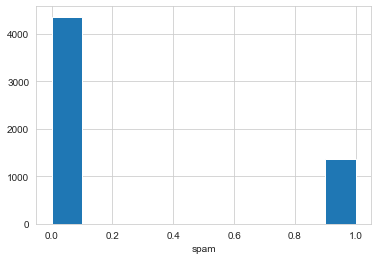

In [10]:
sns.set_style('whitegrid')
df['spam'].hist(bins=10)
plt.xlabel('spam')

In [11]:
#text length

df['text length'] = df['text'].apply(len)

In [12]:
df.head()

,text,spam,text length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


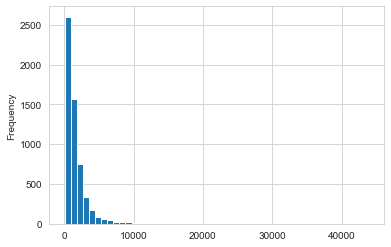

In [15]:
df['text length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDAC7C5198>,
      dtype=object)

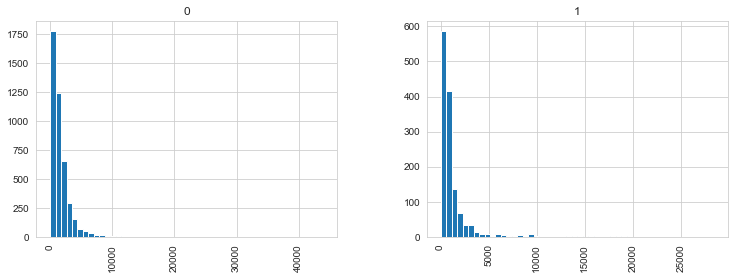

In [16]:
df.hist(column='text length',by='spam',bins=50,figsize=(12,4))

##Text Pre-processing

In [26]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\byron\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [27]:



def text_process(sample_text):

    nopunc = [char for char in sample_text if char not in string.punctuation]

    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [28]:
df.head()

,text,spam,text length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [29]:
df['text'].head(5).apply(text_process)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

##Vectorization

In [34]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])

print(len(bow_transformer.vocabulary_))

37229


In [36]:
df4 = df['text'][3]
print(df4)

Subject: 4 color printing special  request additional information now ! click here  click here for a printable version of our order form ( pdf format )  phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com  request additional information now ! click here  click here for a printable version of our order form ( pdf format )  golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation . 


In [37]:
df4 = bow_transformer.transform([df4])
print(df4)
print(df4.shape)

  (0, 1536)	2
  (0, 1821)	1
  (0, 2189)	1
  (0, 2546)	2
  (0, 3096)	1
  (0, 3102)	1
  (0, 3375)	1
  (0, 3638)	1
  (0, 3983)	2
  (0, 4148)	1
  (0, 5916)	1
  (0, 7627)	1
  (0, 7837)	1
  (0, 8867)	4
  (0, 9144)	1
  (0, 9165)	1
  (0, 12578)	2
  (0, 14451)	1
  (0, 15083)	2
  (0, 15096)	2
  (0, 16062)	1
  (0, 16063)	1
  (0, 16217)	1
  (0, 18238)	2
  (0, 18850)	1
  (0, 21358)	2
  (0, 22239)	1
  (0, 24602)	2
  (0, 25420)	2
  (0, 25825)	1
  (0, 26876)	2
  (0, 26881)	2
  (0, 27783)	1
  (0, 27917)	1
  (0, 28699)	2
  (0, 31342)	1
  (0, 31535)	1
  (0, 35388)	2
(1, 37229)


In [38]:
print(bow_transformer.get_feature_names()[15083])
print(bow_transformer.get_feature_names()[28699])

form
request


In [39]:
messages_bow = bow_transformer.transform(df['text'])

In [40]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5728, 37229)
Amount of Non-Zero occurences:  565908


In [41]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(df4)
print(tfidf4)

  (0, 35388)	0.15009924829386814
  (0, 31535)	0.07911749812249139
  (0, 31342)	0.10451789615280674
  (0, 28699)	0.13491907850445484
  (0, 27917)	0.09440125957327901
  (0, 27783)	0.16364865212009344
  (0, 26881)	0.24467667505731658
  (0, 26876)	0.29488017392240273
  (0, 25825)	0.05978682676762733
  (0, 25420)	0.18310050334136746
  (0, 24602)	0.13202412798634627
  (0, 22239)	0.051084627712002784
  (0, 21358)	0.10288574502638495
  (0, 18850)	0.1714050833961326
  (0, 18238)	0.09675112717120636
  (0, 16217)	0.1714050833961326
  (0, 16063)	0.1714050833961326
  (0, 16062)	0.13162596285519088
  (0, 15096)	0.20264439881127697
  (0, 15083)	0.14267095050584133
  (0, 14451)	0.059703107976188226
  (0, 12578)	0.09903595084928829
  (0, 9165)	0.03967747988499745
  (0, 9144)	0.12233833752865829
  (0, 8867)	0.26688845697733726
  (0, 7837)	0.1714050833961326
  (0, 7627)	0.08511363424674641
  (0, 5916)	0.1714050833961326
  (0, 4148)	0.10060023775103406
  (0, 3983)	0.1420620343113847
  (0, 3638)	0.01912971

In [43]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

4.025675160717941
3.2782714545804814


In [44]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5728, 37229)


In [51]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['spam'])

In [53]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', df.spam[3])

predicted: 0
expected: 1


In [54]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

[1 1 1 ... 0 0 0]


In [56]:
from sklearn.metrics import classification_report
print (classification_report(df['spam'], all_predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4360
           1       1.00      0.77      0.87      1368

    accuracy                           0.95      5728
   macro avg       0.97      0.88      0.92      5728
weighted avg       0.95      0.95      0.94      5728



In [57]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['text'], df['spam'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4582 1146 5728


In [58]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [59]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FDABD01620>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [60]:
predictions = pipeline.predict(msg_test)

In [61]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1006
           1       0.54      1.00      0.71       140

    accuracy                           0.90      1146
   macro avg       0.77      0.94      0.82      1146
weighted avg       0.94      0.90      0.91      1146

